In [1]:
file_path = r"D:\Resume\Societe General\Credit_Risk_Modelling_PD_Prediction_Pipeline\Dataset\Loan_status_2007-2020Q3.gzip"

with open(file_path, "rb") as f:
    print("File opened successfully!")


File opened successfully!


In [3]:
import os

file_path = r"D:\Resume\Societe General\Credit_Risk_Modelling_PD_Prediction_Pipeline\Dataset\Loan_status_2007-2020Q3.gzip"

print("File size (MB):", os.path.getsize(file_path) / (1024*1024))


File size (MB): 1691.313271522522


In [4]:
with open(file_path, "rb") as f:
    print(f.read(4))


b',id,'


In [5]:
import pandas as pd

file_path = r"D:\Resume\Societe General\Credit_Risk_Modelling_PD_Prediction_Pipeline\Dataset\Loan_status_2007-2020Q3.gzip"

df = pd.read_csv(
    file_path,
    low_memory=False,
    nrows=200000   # load subset first
)

print("Shape:", df.shape)
print("\nFirst 5 columns:\n", df.columns[:5])
print("\nSample rows:\n", df.head())


Shape: (200000, 142)

First 5 columns:
 Index(['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv'], dtype='str')

Sample rows:
    Unnamed: 0       id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0           0  1077501     5000.0       5000.0           4975.0   36 months   
1           1  1077430     2500.0       2500.0           2500.0   60 months   
2           2  1077175     2400.0       2400.0           2400.0   36 months   
3           3  1076863    10000.0      10000.0          10000.0   36 months   
4           4  1075358     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade  ... hardship_start_date  \
0   10.65%       162.87     B        B2  ...                 NaN   
1   15.27%        59.83     C        C4  ...                 NaN   
2   15.96%        84.33     C        C5  ...                 NaN   
3   13.49%       339.31     C        C1  ...                 NaN   
4   12.69%        67.79     B        B5  .

### Check Unique Loan Status Values

In [6]:
print(df["loan_status"].value_counts())

loan_status
Fully Paid                                             167026
Charged Off                                             30224
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64


In [7]:
# Keep only completed loans
valid_status = [
    "Fully Paid",
    "Charged Off",
    "Does not meet the credit policy. Status:Fully Paid",
    "Does not meet the credit policy. Status:Charged Off"
]

df = df[df["loan_status"].isin(valid_status)].copy()

print("Shape after filtering:", df.shape)
print("\nUpdated status distribution:\n", df["loan_status"].value_counts())


Shape after filtering: (199999, 142)

Updated status distribution:
 loan_status
Fully Paid                                             167026
Charged Off                                             30224
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64


## save file for easy retrival

In [8]:
df.to_parquet(
    r"D:\Resume\Societe General\Credit_Risk_Modelling_PD_Prediction_Pipeline\Dataset\processed_loan_data.parquet",
    index=False
)

print("Parquet file saved successfully.")


Parquet file saved successfully.


## load data

In [1]:
import pandas as pd

df = pd.read_parquet(
    r"D:\Resume\Societe General\Credit_Risk_Modelling_PD_Prediction_Pipeline\Dataset\processed_loan_data.parquet"
)

print("Shape:", df.shape)
print(df.head())


C:\Users\sindh\anaconda3\Lib\site-packages\pandas\core\computation\expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.8.7' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\sindh\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:56: UserWarning: Pandas requires version '1.4.2' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Shape: (199999, 142)
   Unnamed: 0       id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0           0  1077501     5000.0       5000.0           4975.0   36 months   
1           1  1077430     2500.0       2500.0           2500.0   60 months   
2           2  1077175     2400.0       2400.0           2400.0   36 months   
3           3  1076863    10000.0      10000.0          10000.0   36 months   
4           4  1075358     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade  ... hardship_start_date  \
0   10.65%       162.87     B        B2  ...                 NaN   
1   15.27%        59.83     C        C4  ...                 NaN   
2   15.96%        84.33     C        C5  ...                 NaN   
3   13.49%       339.31     C        C1  ...                 NaN   
4   12.69%        67.79     B        B5  ...                 NaN   

  hardship_end_date payment_plan_start_date  hardship_length hardship_dpd  \
0               Na

In [2]:
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [3]:
# Let's check all columns
print("Total columns:", len(df.columns))
print(df.columns.tolist())


Total columns: 142
['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_

In [4]:
leakage_cols = [
    'recoveries',
    'collection_recovery_fee',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'total_pymnt',
    'total_pymnt_inv',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'next_pymnt_d',
    'out_prncp',
    'out_prncp_inv',
    'last_credit_pull_d',
    'last_fico_range_high',
    'last_fico_range_low',
    'hardship_flag',
    'hardship_type',
    'hardship_reason',
    'hardship_status',
    'hardship_amount',
    'hardship_start_date',
    'hardship_end_date',
    'payment_plan_start_date',
    'hardship_length',
    'hardship_dpd',
    'hardship_loan_status',
    'orig_projected_additional_accrued_interest',
    'hardship_payoff_balance_amount',
    'hardship_last_payment_amount',
    'debt_settlement_flag'
]

df = df.drop(columns=[col for col in leakage_cols if col in df.columns])


In [5]:
print(len(df.columns))

112


In [6]:
drop_cols = [
    'Unnamed: 0',
    'id',
    'url',
    'title',
    'emp_title',
    'zip_code',
    'issue_d',
    'loan_status'
]

df = df.drop(columns=[col for col in drop_cols if col in df.columns])


In [7]:
print(len(df.columns))

104


In [8]:
more_drop_cols = [
    'policy_code',
    'pymnt_plan',
    'initial_list_status',
    'application_type'
]

df = df.drop(columns=[col for col in more_drop_cols if col in df.columns])


In [9]:
print(len(df.columns))


100


In [10]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,1500.0,1500.0,1500.0,36 months,7.90%,46.94,A,A4,5 years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199995,14075.0,14075.0,14075.0,36 months,8.90%,446.93,A,A5,NaN,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199996,11000.0,11000.0,11000.0,36 months,14.09%,376.44,B,B5,2 years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199997,31400.0,31400.0,31400.0,60 months,22.95%,884.28,F,F1,3 years,MORTGAGE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print("default_flag" in df.columns)


False


In [13]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths'

In [5]:
import pandas as pd

C:\Users\sindh\anaconda3\Lib\site-packages\pandas\core\computation\expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.8.7' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\sindh\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:56: UserWarning: Pandas requires version '1.4.2' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:
raw_path = r"D:\Resume\Societe General\Credit_Risk_Modelling_PD_Prediction_Pipeline\Dataset\Loan_status_2007-2020Q3.gzip"

df_raw = pd.read_csv(raw_path, low_memory=False, nrows=200000)

print(df_raw.shape)


(200000, 142)


In [7]:
valid_status = [
    "Fully Paid",
    "Charged Off",
    "Does not meet the credit policy. Status:Fully Paid",
    "Does not meet the credit policy. Status:Charged Off"
]

df = df_raw[df_raw["loan_status"].isin(valid_status)].copy()

print(df.shape)
print(df["loan_status"].value_counts())


(199999, 142)
loan_status
Fully Paid                                             167026
Charged Off                                             30224
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64


## Create default_flag

In [8]:
df["default_flag"] = df["loan_status"].apply(
    lambda x: 1 if "Charged Off" in x else 0
)

print(df["default_flag"].value_counts())
print("Default rate:", df["default_flag"].mean())


default_flag
0    169014
1     30985
Name: count, dtype: int64
Default rate: 0.15492577462887314


In [9]:
leakage_cols = [
    'recoveries',
    'collection_recovery_fee',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'total_pymnt',
    'total_pymnt_inv',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'next_pymnt_d',
    'out_prncp',
    'out_prncp_inv',
    'last_credit_pull_d',
    'last_fico_range_high',
    'last_fico_range_low',
    'hardship_flag',
    'hardship_type',
    'hardship_reason',
    'hardship_status',
    'hardship_amount',
    'hardship_start_date',
    'hardship_end_date',
    'payment_plan_start_date',
    'hardship_length',
    'hardship_dpd',
    'hardship_loan_status',
    'orig_projected_additional_accrued_interest',
    'hardship_payoff_balance_amount',
    'hardship_last_payment_amount',
    'debt_settlement_flag'
]

df = df.drop(columns=[col for col in leakage_cols if col in df.columns])


In [10]:
print(len(df.columns))
df.columns

113


Index(['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc',
       'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med', 'deferral_term', 'default_flag'],
      dtype='str', length=113)

In [11]:
drop_cols = [
    'Unnamed: 0',
    'id',
    'url',
    'title',
    'emp_title',
    'zip_code',
    'issue_d',
    'loan_status'
]

df = df.drop(columns=[col for col in drop_cols if col in df.columns])


In [12]:
print(len(df.columns))

105


In [13]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       ...
       'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc',
       'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med', 'deferral_term', 'default_flag'],
      dtype='str', length=105)

### Separate X and y (Final Clean Version)

In [14]:
y = df["default_flag"]
X = df.drop(columns=["default_flag"])

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (199999, 104)
Target shape: (199999,)


## Analyze Missing Values (Systematically)

In [15]:
missing_percent = X.isnull().mean() * 100
missing_percent = missing_percent.sort_values(ascending=False)

print(missing_percent.head(20))


total_cu_tl                  100.0
inq_fi                       100.0
verification_status_joint    100.0
open_acc_6m                  100.0
open_act_il                  100.0
open_il_12m                  100.0
open_il_24m                  100.0
mths_since_rcnt_il           100.0
total_bal_il                 100.0
il_util                      100.0
open_rv_12m                  100.0
open_rv_24m                  100.0
max_bal_bc                   100.0
all_util                     100.0
inq_last_12m                 100.0
annual_inc_joint             100.0
revol_bal_joint              100.0
sec_app_fico_range_low       100.0
sec_app_fico_range_high      100.0
sec_app_earliest_cr_line     100.0
dtype: float64


## Drop Columns with 100% Missing

In [16]:
cols_100_missing = missing_percent[missing_percent == 100].index.tolist()

print("Columns to drop:", len(cols_100_missing))

X = X.drop(columns=cols_100_missing)

print("New feature shape:", X.shape)


Columns to drop: 29
New feature shape: (199999, 75)


## Drop Columns with >80% Missing

In [17]:
# Recalculate missing after dropping 100% cols
missing_percent = X.isnull().mean() * 100

cols_high_missing = missing_percent[missing_percent > 80].index.tolist()

print("Columns with >80% missing:", len(cols_high_missing))
print(cols_high_missing)

X = X.drop(columns=cols_high_missing)

print("New feature shape:", X.shape)


Columns with >80% missing: 4
['mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_recent_bc_dlq', 'deferral_term']
New feature shape: (199999, 71)


In [19]:
print(X.dtypes.value_counts())


float64    57
str        14
Name: count, dtype: int64


In [29]:
X["int_rate"] = X["int_rate"].str.replace("%", "").astype(float)

print(X["int_rate"].head())
print(X["int_rate"].dtype)


0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64
float64


int_rate is now clean and numeric.

## Convert term to Numeric

In [30]:
X["term"] = X["term"].str.replace(" months", "").astype(int)

print(X["term"].head())
print(X["term"].dtype)


0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int32
int32


term is now numeric. Good.

## STEP 10 — Clean emp_length

In [31]:
# Clean emp_length
X["emp_length"] = (
    X["emp_length"]
    .str.replace(" years", "", regex=False)
    .str.replace(" year", "", regex=False)
    .str.replace("10+", "10", regex=False)
    .str.replace("< 1", "0", regex=False)
)

X["emp_length"] = X["emp_length"].astype(float)

print(X["emp_length"].head(10))
print(X["emp_length"].dtype)


0    10.0
1     0.0
2    10.0
3    10.0
4     1.0
5     3.0
6     8.0
7     9.0
8     4.0
9     0.0
Name: emp_length, dtype: float64
float64


##  Convert revol_util from % to Float

In [32]:
X["revol_util"] = (
    X["revol_util"]
    .str.replace("%", "", regex=False)
)

X["revol_util"] = X["revol_util"].astype(float)

print(X["revol_util"].head())
print(X["revol_util"].dtype)


0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64
float64


### Handle Missing Values (Numeric Columns)

In [33]:
# Identify numeric columns
numeric_cols = X.select_dtypes(include=["float64", "int64", "int32"]).columns

print("Number of numeric columns:", len(numeric_cols))

# Fill numeric NaNs with median
for col in numeric_cols:
    X[col] = X[col].fillna(X[col].median())

print("Remaining numeric NaNs:", X[numeric_cols].isnull().sum().sum())


Number of numeric columns: 61
Remaining numeric NaNs: 0


## Handle Categorical Missing Values

In [34]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=["object"]).columns

print("Number of categorical columns:", len(categorical_cols))

# Fill categorical NaNs
for col in categorical_cols:
    X[col] = X[col].fillna("Unknown")

print("Remaining categorical NaNs:", X[categorical_cols].isnull().sum().sum())


Number of categorical columns: 10
Remaining categorical NaNs: 0


C:\Users\sindh\AppData\Local\Temp\ipykernel_7180\3874291958.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = X.select_dtypes(include=["object"]).columns


### Encode Categorical Variables

We have 10 categorical columns.
First, let’s inspect them.

In [35]:
print(categorical_cols.tolist())


['grade', 'sub_grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'application_type']


### Drop Useless Categorical Columns

In [37]:
drop_cat_cols = ["pymnt_plan", "initial_list_status", "application_type"]

X = X.drop(columns=[col for col in drop_cat_cols if col in X.columns])

print("Remaining categorical columns:")
print(X.select_dtypes(include=["object"]).columns.tolist())


Remaining categorical columns:
['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'earliest_cr_line']


C:\Users\sindh\AppData\Local\Temp\ipykernel_7180\1604639756.py:6: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  print(X.select_dtypes(include=["object"]).columns.tolist())


### Convert earliest_cr_line to Credit History Length

### Convert Using Flexible Parsing

In [39]:
from datetime import datetime

# Convert to datetime automatically
X["earliest_cr_line"] = pd.to_datetime(X["earliest_cr_line"], errors="coerce")

# Check if any conversion failed
print("Nulls after conversion:", X["earliest_cr_line"].isnull().sum())

# Calculate credit history length
current_year = datetime.now().year
X["credit_history_years"] = current_year - X["earliest_cr_line"].dt.year

# Drop original column
X = X.drop(columns=["earliest_cr_line"])

print(X["credit_history_years"].head())
print(X["credit_history_years"].dtype)


Nulls after conversion: 29
0    41.0
1    27.0
2    25.0
3    30.0
4    30.0
Name: credit_history_years, dtype: float64
float64


C:\Users\sindh\AppData\Local\Temp\ipykernel_7180\3321276843.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X["earliest_cr_line"] = pd.to_datetime(X["earliest_cr_line"], errors="coerce")


### Fill Missing in credit_history_years

In [40]:
X["credit_history_years"] = X["credit_history_years"].fillna(
    X["credit_history_years"].median()
)

print("Remaining NaNs in credit_history_years:",
      X["credit_history_years"].isnull().sum())


Remaining NaNs in credit_history_years: 0


### Encode Categorical Variables

In [41]:
X = pd.get_dummies(X, drop_first=True)

print("Shape after encoding:", X.shape)


Shape after encoding: (199999, 170)


### Train-Test Split (Now We Model)

For now, we’ll use stratified split (keeps default ratio consistent).

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

print("Train default rate:", y_train.mean())
print("Test default rate:", y_test.mean())


Train shape: (139999, 170)
Test shape: (60000, 170)
Train default rate: 0.15492253516096544
Test default rate: 0.15493333333333334


### Train Logistic Regression (Baseline PD Model)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

# Initialize model
lr = LogisticRegression(max_iter=1000)

# Train
lr.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = lr.predict_proba(X_test)[:, 1]

# Predict class labels
y_pred = lr.predict(X_test)

# Metrics
auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

print("ROC-AUC:", auc)
print("Accuracy:", accuracy)


C:\Users\sindh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC-AUC: 0.640100773959789
Accuracy: 0.845


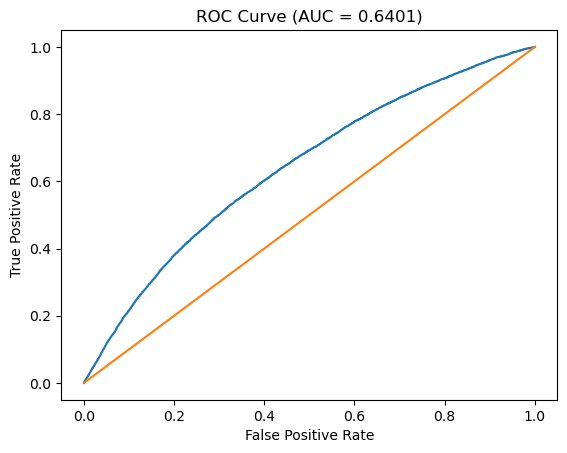

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {auc_score:.4f})")
plt.show()


## compute KS

In [45]:
import numpy as np
from scipy.stats import ks_2samp

# KS calculation
ks_stat = ks_2samp(
    y_pred_proba[y_test == 1],   # defaulters
    y_pred_proba[y_test == 0]    # non-defaulters
)

print("KS Statistic:", ks_stat.statistic)


KS Statistic: 0.20597505199086025


### Train XGBoost Model

In [46]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

# Initialize XGBoost
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

# Train
xgb.fit(X_train, y_train)

# Predict
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]
y_pred_xgb = xgb.predict(X_test)

# Metrics
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

print("XGBoost ROC-AUC:", auc_xgb)
print("XGBoost Accuracy:", acc_xgb)


XGBoost ROC-AUC: 0.701766569685065
XGBoost Accuracy: 0.8451


## Now Compute KS for XGBoost

In [47]:
from scipy.stats import ks_2samp

ks_xgb = ks_2samp(
    y_pred_proba_xgb[y_test == 1],
    y_pred_proba_xgb[y_test == 0]
)

print("XGBoost KS:", ks_xgb.statistic)


XGBoost KS: 0.2981889352478208


## Feature Importance Analysis (XGBoost)

Let’s see what model is actually using.

In [48]:
import pandas as pd

feature_importance = pd.Series(
    xgb.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print(feature_importance.head(15))


int_rate                  0.096968
term                      0.070693
grade_B                   0.044523
grade_C                   0.022804
grade_F                   0.016912
fico_range_low            0.016429
annual_inc                0.016048
grade_D                   0.015750
purpose_small_business    0.015090
acc_open_past_24mths      0.013024
fico_range_high           0.012927
inq_last_6mths            0.012450
funded_amnt               0.011177
addr_state_OH             0.010317
purpose_credit_card       0.010312
dtype: float32


### Drop Derived Risk Columns

In [50]:
cols_to_drop = [col for col in X.columns if "grade_" in col]
cols_to_drop += ["int_rate"]

X_reduced = X.drop(columns=cols_to_drop)

print("New shape:", X_reduced.shape)


New shape: (199999, 129)


## Retrain XGBoost (Without Derived Risk Signals)

In [51]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

# Split again using reduced dataset
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reduced,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Train XGBoost
xgb_r = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

xgb_r.fit(X_train_r, y_train_r)

# Predict
y_pred_proba_r = xgb_r.predict_proba(X_test_r)[:, 1]
y_pred_r = xgb_r.predict(X_test_r)

# Metrics
auc_r = roc_auc_score(y_test_r, y_pred_proba_r)
acc_r = accuracy_score(y_test_r, y_pred_r)

print("Reduced Model ROC-AUC:", auc_r)
print("Reduced Model Accuracy:", acc_r)


Reduced Model ROC-AUC: 0.7007777088524725
Reduced Model Accuracy: 0.8448333333333333


### Optimize XGBoost Using scale_pos_weight

In [53]:
# Calculate class imbalance ratio
neg = y_train_r.value_counts()[0]
pos = y_train_r.value_counts()[1]

scale_pos_weight = neg / pos

print("Scale Pos Weight:", scale_pos_weight)


Scale Pos Weight: 5.454838858407488


## Retrain XGBoost with Class Weighting

In [54]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

xgb_weighted = XGBClassifier(
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric="logloss",
    random_state=42
)

xgb_weighted.fit(X_train_r, y_train_r)

# Predict
y_pred_proba_w = xgb_weighted.predict_proba(X_test_r)[:, 1]
y_pred_w = xgb_weighted.predict(X_test_r)

# Metrics
auc_w = roc_auc_score(y_test_r, y_pred_proba_w)
acc_w = accuracy_score(y_test_r, y_pred_w)

print("Weighted XGBoost ROC-AUC:", auc_w)
print("Weighted XGBoost Accuracy:", acc_w)


Weighted XGBoost ROC-AUC: 0.7009082004889231
Weighted XGBoost Accuracy: 0.6488


## Compute KS for Weighted Model

In [56]:
from scipy.stats import ks_2samp

ks_w = ks_2samp(
    y_pred_proba_w[y_test_r == 1],
    y_pred_proba_w[y_test_r == 0]
)

print("Weighted XGBoost KS:", ks_w.statistic)


Weighted XGBoost KS: 0.2966308388220872


## Compute Gini Coefficient

In credit risk: Gini=2×AUC−1

In [58]:
gini = 2 * auc_w - 1
print("Gini Coefficient:", gini)


Gini Coefficient: 0.4018164009778462


## Build Risk Bands (PD Segmentation)

In [59]:
import pandas as pd

# Create DataFrame for test predictions
results = pd.DataFrame({
    "PD": y_pred_proba_w,
    "actual": y_test_r
})

# Create 5 risk bands (quintiles)
results["risk_band"] = pd.qcut(
    results["PD"],
    5,
    labels=["Very Low", "Low", "Medium", "High", "Very High"]
)

# Default rate per band
band_summary = results.groupby("risk_band").agg(
    count=("actual", "count"),
    defaults=("actual", "sum")
)

band_summary["default_rate"] = band_summary["defaults"] / band_summary["count"]

print(band_summary)


           count  defaults  default_rate
risk_band                               
Very Low   12000       588      0.049000
Low        12000      1051      0.087583
Medium     12000      1637      0.136417
High       12000      2347      0.195583
Very High  12000      3673      0.306083


## KS Curve Visualization

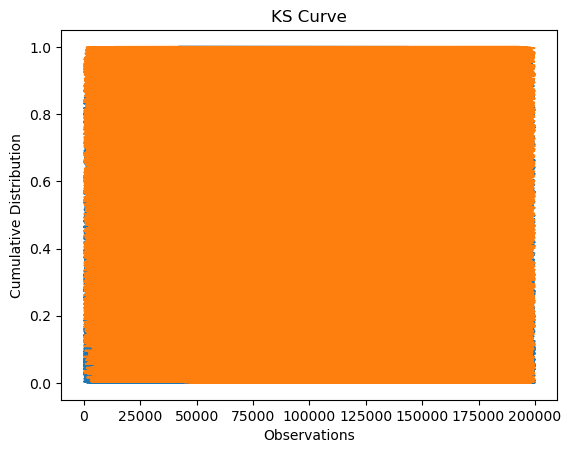

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Sort by PD
results_sorted = results.sort_values("PD")

# Cumulative distributions
results_sorted["cum_bad"] = np.cumsum(results_sorted["actual"]) / results_sorted["actual"].sum()
results_sorted["cum_good"] = np.cumsum(1 - results_sorted["actual"]) / (1 - results_sorted["actual"]).sum()

# KS value at each point
results_sorted["ks"] = results_sorted["cum_bad"] - results_sorted["cum_good"]

# Plot
plt.figure()
plt.plot(results_sorted["cum_bad"])
plt.plot(results_sorted["cum_good"])
plt.title("KS Curve")
plt.xlabel("Observations")
plt.ylabel("Cumulative Distribution")
plt.show()


### Correct KS Curve (Proper Banking Version)

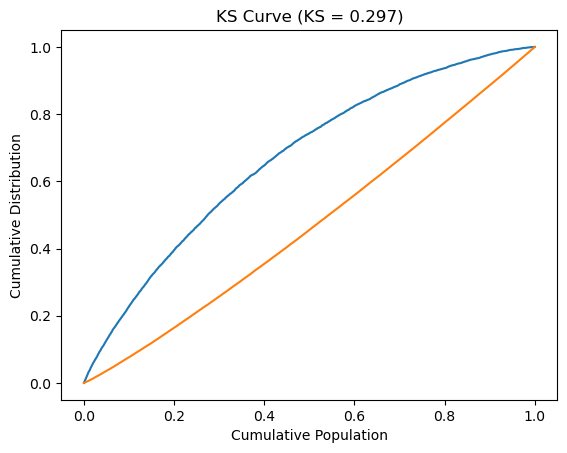

Maximum KS: 0.29663083882208724


In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Sort by predicted PD descending
results_sorted = results.sort_values("PD", ascending=False).reset_index(drop=True)

# Create cumulative population %
results_sorted["cum_population"] = np.arange(1, len(results_sorted)+1) / len(results_sorted)

# Cumulative bad & good
total_bad = results_sorted["actual"].sum()
total_good = len(results_sorted) - total_bad

results_sorted["cum_bad"] = results_sorted["actual"].cumsum() / total_bad
results_sorted["cum_good"] = (1 - results_sorted["actual"]).cumsum() / total_good

# KS
results_sorted["ks"] = results_sorted["cum_bad"] - results_sorted["cum_good"]
ks_value = results_sorted["ks"].max()

# Plot
plt.figure()
plt.plot(results_sorted["cum_population"], results_sorted["cum_bad"])
plt.plot(results_sorted["cum_population"], results_sorted["cum_good"])
plt.title(f"KS Curve (KS = {ks_value:.3f})")
plt.xlabel("Cumulative Population")
plt.ylabel("Cumulative Distribution")
plt.show()

print("Maximum KS:", ks_value)


## Reduce Noise from One-Hot Explosion

### Remove policy exception loans

In [62]:
# Keep only clean statuses
df_clean = df_raw[df_raw["loan_status"].isin(["Fully Paid", "Charged Off"])].copy()

print(df_clean["loan_status"].value_counts())


loan_status
Fully Paid     167026
Charged Off     30224
Name: count, dtype: int64


### Create Target

In [63]:
df_clean["default_flag"] = (df_clean["loan_status"] == "Charged Off").astype(int)

print(df_clean["default_flag"].value_counts())
print("Default rate:", df_clean["default_flag"].mean())


default_flag
0    167026
1     30224
Name: count, dtype: int64
Default rate: 0.15322686945500633


## Create Credit History Years Again

In [65]:
from datetime import datetime
import pandas as pd

# Convert earliest_cr_line
df_clean["earliest_cr_line"] = pd.to_datetime(
    df_clean["earliest_cr_line"],
    errors="coerce"
)

current_year = datetime.now().year

df_clean["credit_history_years"] = (
    current_year - df_clean["earliest_cr_line"].dt.year
)

# Fill missing
df_clean["credit_history_years"] = df_clean["credit_history_years"].fillna(
    df_clean["credit_history_years"].median()
)

print(df_clean["credit_history_years"].head())


C:\Users\sindh\AppData\Local\Temp\ipykernel_7180\2552650199.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean["earliest_cr_line"] = pd.to_datetime(


0    41
1    27
2    25
3    30
4    30
Name: credit_history_years, dtype: int32


In [66]:
df_model = df_clean[selected_cols].copy()
print(df_model.shape)


(197250, 19)


### Clean term and revol_util

In [67]:
# Clean term
df_model["term"] = df_model["term"].str.replace(" months", "").astype(int)

# Clean revol_util
df_model["revol_util"] = (
    df_model["revol_util"]
    .str.replace("%", "", regex=False)
    .astype(float)
)

print(df_model[["term", "revol_util"]].head())


   term  revol_util
0    36        83.7
1    60         9.4
2    36        98.5
3    36        21.0
4    60        53.9


## Add Strong Interaction Features

These ratios are powerful in credit modelling.

In [68]:
# Loan-to-Income Ratio
df_model["loan_to_income"] = df_model["loan_amnt"] / df_model["annual_inc"]

# Installment-to-Income Ratio
df_model["inst_to_income"] = df_model["installment"] / df_model["annual_inc"]

# FICO Spread
df_model["fico_spread"] = df_model["fico_range_high"] - df_model["fico_range_low"]

# Credit Depth
df_model["acc_per_year"] = df_model["total_acc"] / df_model["credit_history_years"]

# Inquiry Pressu`re
df_model["inq_per_acc"] = df_model["inq_last_6mths"] / df_model["total_acc"]

# High DTI Flag
df_model["high_dti_flag"] = (df_model["dti"] > 30).astype(int)

print(df_model.shape)


(197250, 25)


## Handle Missing Values

In [69]:
print(df_model.isnull().sum())


loan_amnt                 0
term                      0
installment               0
annual_inc                0
verification_status       0
home_ownership            0
purpose                   0
dti                       0
delinq_2yrs               0
fico_range_low            0
fico_range_high           0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              142
total_acc                 0
credit_history_years      0
default_flag              0
loan_to_income            0
inst_to_income            0
fico_spread               0
acc_per_year              0
inq_per_acc               0
high_dti_flag             0
dtype: int64


## Fill Missing revol_util

In [70]:
df_model["revol_util"] = df_model["revol_util"].fillna(
    df_model["revol_util"].median()
)

print("Remaining NaNs:", df_model.isnull().sum().sum())


Remaining NaNs: 0


## Encode Categorical Features

In [71]:
df_encoded = pd.get_dummies(
    df_model,
    columns=["verification_status", "home_ownership", "purpose"],
    drop_first=True
)

print(df_encoded.shape)


(197250, 41)


## Split and Train XGBoost (Engineered Model)

In [72]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# Separate X and y
X_new = df_encoded.drop(columns=["default_flag"])
y_new = df_encoded["default_flag"]

# Train-test split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new,
    y_new,
    test_size=0.3,
    random_state=42,
    stratify=y_new
)

# Train XGBoost
xgb_new = XGBClassifier(
    n_estimators=500,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

xgb_new.fit(X_train_new, y_train_new)

# Predict
y_pred_proba_new = xgb_new.predict_proba(X_test_new)[:, 1]

# AUC
auc_new = roc_auc_score(y_test_new, y_pred_proba_new)

print("New Engineered Model ROC-AUC:", auc_new)


New Engineered Model ROC-AUC: 0.6895579189625385


### Use Your Full Feature Dataset Again

In [73]:
print(X_train.shape)


(139999, 170)


### Train Stronger XGBoost (Deeper + More Trees)

In [75]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_tuned = XGBClassifier(
    n_estimators=800,
    max_depth=6,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=3,
    gamma=0.1,
    reg_alpha=0.5,
    reg_lambda=1.5,
    eval_metric="logloss",
    random_state=42
)

xgb_tuned.fit(X_train, y_train)

y_pred_proba_tuned = xgb_tuned.predict_proba(X_test)[:, 1]

auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

print("Tuned XGBoost ROC-AUC:", auc_tuned)


Tuned XGBoost ROC-AUC: 0.7035506028220758
